### Assignment 1

##### Descriptive statistics and statistical hypothesis testing




**In this assignment, we will see:**
- how to **visually inspect** experimental data
- how to characterize experimental data using **descriptive statistics**
- how to perform a simple statistic test using either a **parametric (t-test) or non-parametric (shuffling) method**


<div class="alert alert-block alert-warning">
<b>Preparing for this assignment:</b>

The following resources will help you to get ready to complete this assignment.
<ul>
    <li>Watch <a href="http://youtu.be/5q-Ws4y8JE4" target="_blank">this video</a> (here the <a href="https://www.cmrr.umn.edu/~kendrick/statsmatlab/StatsLecture2Slides_Hypothesis.pdf" target="_blank">slides</a>) only until time stamp 23:08 (stop right after permutation tests) in order to learn about:</li>
    <ul>
        <li>the logic of t-tests to test the hypothesis that two samples have the same mean</li>
        <li>the non-parametric equivalent in permutation tests. Make sure you understand this logic</li>
    </ul>
    <li>Have a look at <a href="https://doi.org/10.1016/j.cub.2018.07.052" target="_blank">this paper</a> (focussing on Figure 1 and the description of the experimental task) to understand the logic of the experimental data that we will analyze.</li>
</ul>
</div>

## About the dataset

In this Assignment, we will use a dataset from a psychophysical experiment in which subjects have to report the mean motion direction of two random dot motion stimuli.

The aim of the paper was to investigate the confirmation bias in a perceptual decision making experiment. Confirmation bias is a phenomenon in which our own decisions bias subsequent judgements. The underlying neural mechanisms are difficult to study in real-life settings but if similar phenemena were observed in lab experiments, it would be more feasable to study these mechanisms.

In any case, in this assignment we will not analyze the confirmation bias, but more basic aspects of the perceptual decision making task presented in the paper. In particular, we will analyze the data from the perceputal estimation task and use descriptive statistics and basic hypothesis tests to establish whether the perceptual reports of the subjects are biased in a systematic way.


***Load the data and organize it in a Pandas dataframe (as in Assignment 0).***
**Note that the data is the same as in Assignment 0 but it contains more trials.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load the data from github
df = pd.read_csv("https://raw.githubusercontent.com/wimmerlab/MBC_data_analysis/main/A1_Statistics/Rawdata_Perceptual_simple.csv",sep=',')

# list of subjects
subjects = np.unique(df.subj)

df.head()


,x1,x2,xavg,estim,subj
0,-10,0,-5,-5.21220,1
1,-10,-10,-10,-8.21768,1
2,20,10,15,-17.93416,1
3,-20,10,-5,-13.42634,1
4,20,-10,5,9.88556,1


We first want to familiarize ourselves with the experimental task. We already know that the subjects have to report the average angle of two random dot motion stimuli. We want to check whether the experiment is well balanced, i.e. whether different average directions are more likely than others. One way to visualize this is to ***plot a histogram which shows us the distribution of mean directions across trials***. Here, we will consider all trials of all subjects but of course you could inspect the histrograms for individual subjects as well.

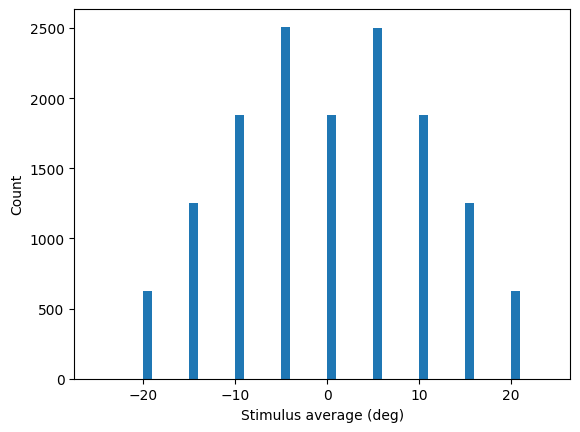

In [3]:
# number of trials for each condition (across all subjects)
xavg = np.unique(df.xavg)

# distribution of xavg
plt.hist(df.xavg,   bins = range(-25,25));

# Add axis labels
plt.xlabel('Stimulus average (deg)')
plt.ylabel('Count')
plt.show()


***Interpret the result.***

Ans: The experimental conditions are well-balanced, i.e. no certain conditions seem extremely likely than others.

***Now add an additional column to the dataframe: the error defined as the difference of the subject's estimation and the average of the stimulus.***

Hint: use the function `circdist` from Assignment 0.

In [4]:
def circdist(angles1, angles2): # define the name and set the arguments between parentheses
    """
    Calculate the circular distance between two angles.

    Parameters:
        angles1 (float): First angle. Scalar or array.
        angles2 (float): First angle. Scalar or array.

    Returns:
        float: Angle difference(s).
    """
    angle_diff = angles1 - angles2 # angle difference
    angle_diff = angle_diff  / 180 * np.pi # convert to radian
    output = np.angle(np.exp(1j * angle_diff))  # mathematical operation to get the circular distance
    output = output / np.pi * 180   # convert back to degrees
    return output  # return the circular distance in radians

df['error'] = circdist(df["estim"], df["xavg"])

df.head()


,x1,x2,xavg,estim,subj,error
0,-10,0,-5,-5.21220,1,-0.21220
1,-10,-10,-10,-8.21768,1,1.78232
2,20,10,15,-17.93416,1,-32.93416
3,-20,10,-5,-13.42634,1,-8.42634
4,20,-10,5,9.88556,1,4.88556


## 1. Data cleaning

Let's have a look at the distribution of the subject's errors. For simplicity, let's consider again the aggragate data of all subjects. ***Plot the histogram of errors.***





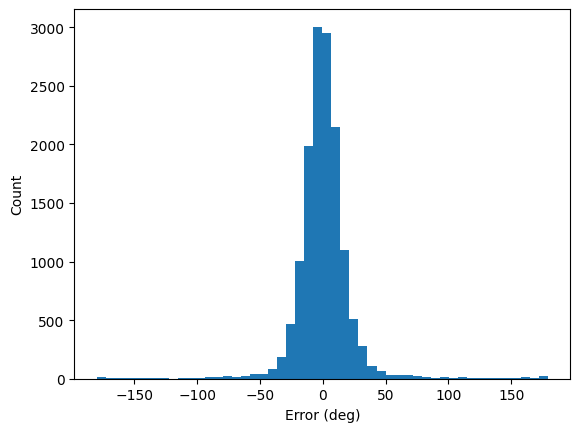

In [5]:

plt.hist(df.error,50)

# Add axis labels
plt.xlabel('Error (deg)')
plt.ylabel('Count');


Observe that the estimation errors are usally below 50 degree (which already may seem quite surprisingly large) but in some trials the estimation errors are exceptionally large. Such **estimation outliers** may have a huge impact on subsequent analyses and one may want to remove them. Whether to remove outliers or no can be a tricky question. In this particular experiment, we suspect that in trials with very large errors the subjects were actually not paying attention and responded just randomly. It is important to remember is that we need to report the criteria was used to clean the data (for an example see the methods section of Talluri et al. (2018) for their exact data exclusion criterion).

How can we remove outliers? Here, we will use the `zscore` function to identify outliers. Google about it to learn its meaning. A typical threshold for outliers is 3 standard deviations from the mean, in either direction.

Hint: here we will need to subset the rows of a Pandas dataframe, and this can be tricky. By default, the Pandas dataframe keeps the row indices of the original full dataframe, so the new subset dataframe will lack a series of row indices. In order to force a re-numbering of rows in the subset, we need to invoke `reset_index()`. Still, Pandas will consider that we still want to keep the connection with the parent dataset so it will add by default a new column (called 'index') with the row indices in the parent dataset. If we do not want this column added, then we will invoke `reset_index(drop=True)`. Another possibility is to use `iloc`.

Number of Upper outliers : 170
Number of Lower outliers : 138


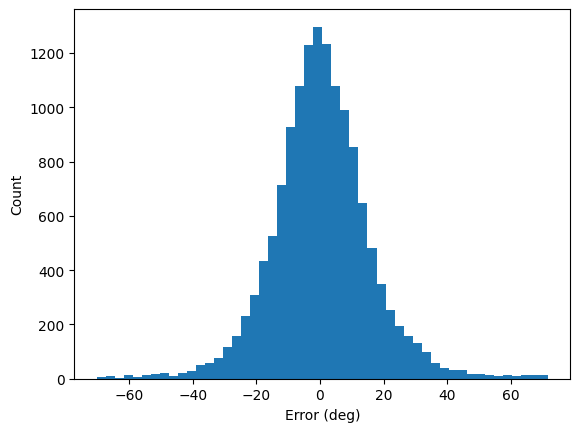

In [6]:
from scipy.stats import zscore # we import the zscore function

# get the number of upper outliers
upp_out = sum(zscore(df.error) > 3 )
print('Number of Upper outliers : ' + str(upp_out))

# get the number of lower outliers
low_out = sum(zscore(df.error) < -3 )
print('Number of Lower outliers : ' + str(low_out))

# now get the dataset excluding outliers
rem_out = abs(zscore(df.error)) < 3. # boolean for the non-outlier data rows
df = df[rem_out].reset_index(drop=True) # data without outliers

# and plot again the histogram
plt.hist(df.error,50)
plt.xlabel('Error (deg)')
plt.ylabel('Count');


## 2. Characterizing data: descriptive statistics

In general, plotting the data and characterizing it with a few summarizing statistics that give a good succint description of the data is the first thing that one should do. Understanding what the data is like is fundamental to design meaningful analyses.

One very basic property of our data is that we expect that the estimations reported by the subjects should depend on the stimulus average. A simple way of visualizing this is to ***compute the average estimate for each possible stimulus average and plot this average values in a figure***.

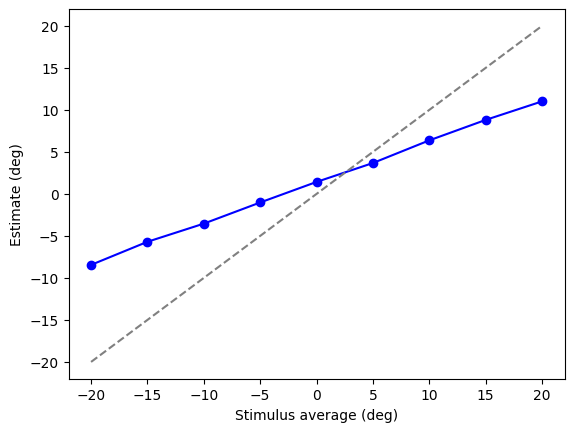

In [7]:

mean_values = []  # start with an empty list of mean values for

for xavg_value in xavg:

    # Get all trials with a particular value of the stimulus average
    subset = df['xavg'] == xavg_value

    # Calculate mean of the subjects estimation for this stimulus average
    mean_value = np.mean(df[subset])

    # Append the mean to list
    mean_values.append(mean_value)

# Plot mean values with dots for data points
plt.plot(xavg, mean_values, marker='o', linestyle='-', color='blue')

# Add axis labels
plt.xlabel('Stimulus average (deg)')
plt.ylabel('Estimate (deg)')

# Add a dotted line indicating the identity line
plt.plot(xavg, xavg, linestyle='--', color='gray');


***Interpret the result.***

Ans: The plot shows correlation of average estimation with actual average of degrees. Overall, the estimate values increase with stimulus average. The graph shows somewhat linearity but falls constantly below x=y line, suggesting a central bias. Subjects systematically either overestimate smaller values or underestimate large values, pulling towards 0.

A more compact way of computing the same result is to use `groupby`. Try to understand the following code. Note that in addition to the mean, here we also computed the standard deviation and plot an errorbar for each value of the stimulus average. This indicates the large trial-to-trial variability in the estimates for all values of the stimulus average.

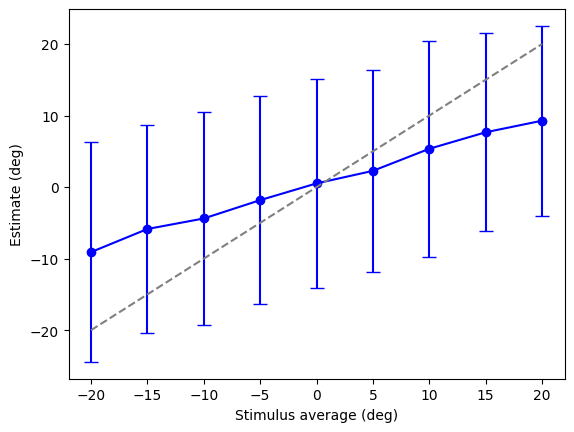

In [8]:
# Calculate mean and standard deviation using groupby
grouped_data = df.groupby('xavg')['estim'].agg(['mean','std']).reset_index()

# Plot mean values with dots for data points
plt.plot(grouped_data['xavg'], grouped_data['mean'], marker='o', linestyle='-', color='blue');

# add error bars with standard deviation
plt.errorbar(grouped_data['xavg'], grouped_data['mean'], yerr=grouped_data['std'], linestyle='None', color='blue', capsize=5, label='Error Bars')

plt.plot(xavg, xavg, linestyle='--', color='gray')

plt.xlabel('Stimulus average (deg)')
plt.ylabel('Estimate (deg)');


## 3. Statistical hypothesis testing

We have seen that the estimates of the subjecst seem biased towards zero (i.e., the reports are on average smaller than the true stimulus average). However, we have observed this by combining all trials of all subjects and not all subjects may show this tendency. Moreover, we have also seen a large variability from trial and we would now like to do some quantitive statistical analysis to test whether there are significant differences in the subject's errors depending on the stimulus average.
Note that the apparent "bias to the mean", or *central tendency bias*, or *contraction bias*, is a common phenomenon where the judgment of the magnitude of items held in working memory appears to be biased towards the average of past observations.

### 3.1 Parametric methods

As a simple example, we would like to test whether the errors of subject number 8 differ for the stimulus average 0 deg and the stimulus average 15 deg. The simplest way to test this is by using a *t*-test. # we simply want to know if such difference can be explained simply by chance #

Before we run the statistical test, let's plot this data. Let's plot in different ***histograms the errors when the stimulus average was 0 deg and the error when the stimulus average was 15 deg***. ***we are interested in ERRORS here***

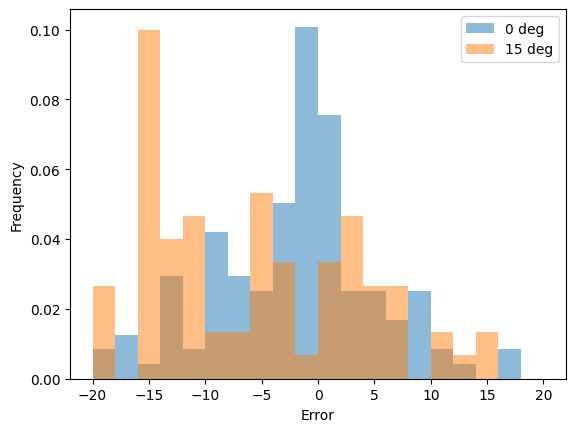

In [9]:
plt.figure()

bool_s = df['subj'] == 8  # we construct a boolean to select rows corresponding to participant *subject*
ds = df[bool_s].copy()  # we subset the full dataframe df to select trials of participant *subject* and create a copy

bool_0 = ds['xavg'] == 0 # get a boolean for 0 deg trials
bool_15 = ds['xavg'] == 15 # get a boolean for 15 deg trials

plt.hist(ds[bool_0].error, alpha=0.5, bins=range(-20, 22, 2), label="0 deg", density=True) # plot histogram of 0 deg trials
plt.hist(ds[bool_15].error, alpha=0.5, bins=range(-20, 22, 2),label="15 deg", density=True) # plot histogram of 15 deg trials

plt.legend(); # draw legend
plt.xlabel('Error')
plt.ylabel('Frequency');

In [10]:
# assert np.sum(bool_0) == 135
# assert np.sum(bool_15) == 89

In the histogram plots above, we used the arguments `alpha=0.5` and `density=True`. Play with those arguments to see what they do. You can vary `alpha` between 0 and 1, and you can switch on and off `density`. You can also read about them [here](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

Now, plot similar histograms for each subject. Remember this is as easy as embedding the code of the two histograms above within a for loop, and subsetting the dataframe to consider only the trials for one given subject (remember `reset_index()` when subsetting rows of a dataframe!).

As a new thing, instead of plotting one new figure for each subject with `plt.figure()`, we will now plot each subject histograms on separate subplots of one single figure. This is accomplished with the `plt.subplot` command. Google it to figure out how to use it. Here we will be using an array of 4x4 subplots.

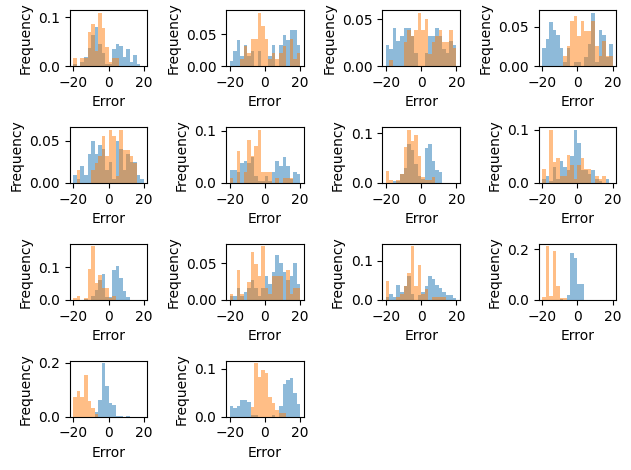

In [11]:
plt.figure() # we generate a new figure outside the for loop, so not a new figure for each subject

for subject in subjects:  # we cycle through the 9 subjects. We know that they are numbered 0 through 8 in column 'subject'

    plt.subplot(4,4,subject) # we now select the subplot where we want to plot the histograms for *subject*

    bool_s = df['subj'] == subject  # we construct a boolean to select rows corresponding to participant *subject*
    ds = df[bool_s] #we subset the full data frame df to select trials we are interested

    bool_0 = ds['xavg'] == 0 # get a boolean for 0 deg trials
    bool_15 = ds['xavg'] == 15 # get a boolean for 15 deg trials

    plt.hist(ds[bool_0].error, alpha=0.5, bins=range(-20, 22, 2), label="0 deg", density=True) # plot histogram of 0 deg trials
    plt.hist(ds[bool_15].error, alpha=0.5, bins=range(-20, 22, 2),label="15 deg", density=True) # plot histogram of 15 deg trials


    plt.xlabel('Error')
    plt.ylabel('Frequency');

plt.tight_layout() # this makes the graph nicer. Try without it (putting a # in front) #why the boxes overlapping??

Here is a more consice version of the same code:

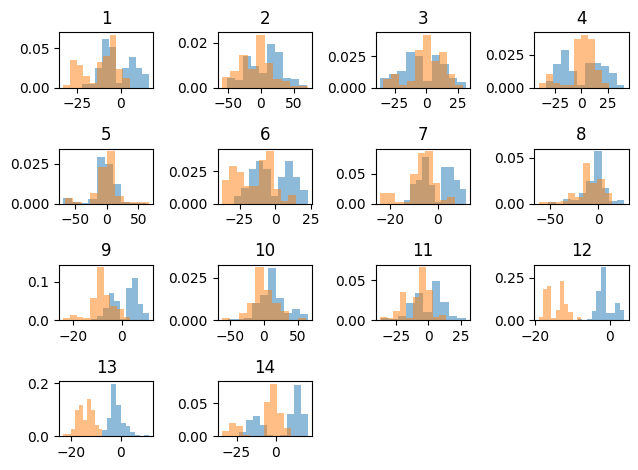

In [12]:
plt.figure()
for subject in subjects:
    plt.subplot(4,4,subject)
    plt.hist(df[(df.subj == subject) & (df.xavg == 0)].error, alpha=0.5, density=True)
    plt.hist(df[(df.subj == subject) & (df.xavg == 15)].error, alpha=0.5, density=True)
    plt.title(str(subject))
plt.tight_layout()

Test if there is a difference between the errors for 0 deg and 15 deg for each subject. We will use the t-test as implemented in the scipy library (you can Google *ttest_ind*)***

Are the subjects overestimating or underestimating the stimulus average? How do you know?

In [13]:
# Run a t-test for each subject separately
from scipy.stats import ttest_ind

for subject in subjects:  # loop through subjects

    bool_s = df['subj'] == subject # boolean for rows corresponding to subject *subject*
    ds = df[bool_s].reset_index(drop=True) # subset dataframe for subject *subject* (remember 'reset_index()' ! )

    bool_0 = ds['xavg'] == 0 # get a boolean for 0 deg trials
    bool_15 = ds['xavg'] == 15 # get a boolean for 15 deg trials

    t, p_val = ttest_ind(ds[bool_0].error,ds[bool_15].error) # t-test comparing mean error in 0 deg and 15 deg trials for subject *subject*

    if p_val < 0.05:
        if ds[bool_0].error.mean() < ds[bool_15].error.mean():
            print('Subject', subject, 'overestimates the stimulus average')
        if ds[bool_0].error.mean() > ds[bool_15].error.mean():
            print('Subject', subject, 'underestimates the stimulus avearge')


Subject 1 underestimates the stimulus avearge
Subject 2 underestimates the stimulus avearge
Subject 3 overestimates the stimulus average
Subject 6 underestimates the stimulus avearge
Subject 7 underestimates the stimulus avearge
Subject 8 underestimates the stimulus avearge
Subject 9 underestimates the stimulus avearge
Subject 10 underestimates the stimulus avearge
Subject 11 underestimates the stimulus avearge
Subject 12 underestimates the stimulus avearge
Subject 13 underestimates the stimulus avearge
Subject 14 underestimates the stimulus avearge


### 3.2 Non-parametric methods (shuffling)

*We* can instead avoid the Gaussian hypothesis by using permutation tests. Here, for each subject one would randomly shuffle the stimulus average label of each trial by keeping the total number in each class fixed. This resampled distribution of trials in two classes then represents one valid representative sample consistent with your null hypothesis (which is your null hypothesis, by the way?). You compute the distance between medians in your resampled classes, and save that statistic. Then you resample again and repeat the process 1,000 times. Finally you compare the actual statistic from your real class separation to the distribution of statistics in samples that are consistent with your null hypothesis and from there derive a p-value for the probability of your null hypothesis being true. Check the video provided in the supporting material above for a step-by-step explanation of this *resampling* or *permutation test*.


First, write in the next cell, using a "Markdown" cell, your null hypothesis in **boldface**-

**H0**: **The difference between mean of estimation errors for xavg=0 and xavg=15 conditions are by change, i.e.there's no statistically significant difference for the difference in two conditions.**

Now use the permutation test for the 4th subject.
Do you get similar results with the *t*-test?

In [20]:
# first we select the data for the 4th subject in the new dataset ds
bool_s = df['subj'] == 4
ds = df[bool_s].reset_index(drop=True)

# we form booleans for the 0 deg and 15 deg trials
bool_0 = ds['xavg'] == 0    # get a boolean for 0 deg trials
bool_15 = ds['xavg'] == 15  # get a boolean for 15 deg trials

# first let's compute the t-test with the true selection of trials and save this for later
t, p_val = ttest_ind(ds[bool_0].error, ds[bool_15].error)

# Now we start the permutation test
# we define our statistic of interest as the difference in medians of the two lists of errors.
statistic = np.median(ds[bool_0].error) - np.median(ds[bool_15].error)

# we now generate the resampled data for the permutation test
n_perm = 1000 # number of permutations desired
stat_perm = []  # notice this trick in Python. We generate an empty list like this, and then we will append successively with *append* in the for loop, after the loop we make a numpy array of this list
for _ in range(n_perm):  # we now run our permutations. Since we will not need to know the number of the permutation in the loop, we use this _ symbol
    np.random.shuffle(bool_0.values)  # shuffle randomly the True/False entries in the array bool_0
    bool_15 = np.invert(bool_0) # invert the reshuffled booleans to get the list of random 15 deg trials
    stat_perm.append(np.median(ds.error[bool_0]) - np.median(ds.error[bool_15])) # compute & save statistic

stat_perm = np.array(stat_perm) # now turn the Python list into a Numpy array for mathematical calculations

# Here is the p-value of our permutation test. The number of times that our statistic exceeded the statistic of the
# shuffles divided by the number of shuffles. We take this as the probability that we had obtained a statistic at
# least as extreme as our true data if our null hypothesis was true.
p_value = np.mean( abs(stat_perm) > abs(statistic));
print('Subject 4, p_value permutat_test: ' +str(p_value))

#plot the t-test result for comparison
print('Subject 4, p_value t-test: ' +str(p_val))

Subject 4, p_value permutat_test: 0.315
Subject 4, p_value t-test: 0.8603111461058479


Now to understand the result of the permutation test, plot a histogram of your resampled statistics in *stat_perm* and mark the statistic that you obtain in your true data on the x-axis.

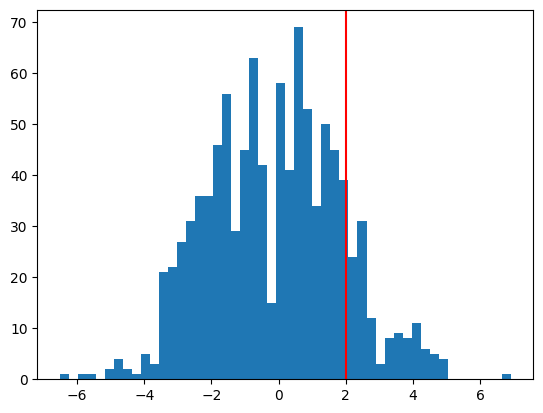

In [21]:
plt.hist(stat_perm, bins=50) # histogram of the resampled statistic
plt.axvline(x=statistic, color='red'); # red vertical line marking the true statistic

Now interpret what the p-value means. Write your answer as a Markdown cell below (Insert it with "Insert"> "Insert Cell Below" in the top menu)

the p values for subject 4 are p (t-test) = 0.86 and p (permutation test) = 0.31. p value <0.05 suggests statistical significance and both p values is greater than 0.05, failing to reject H0 for subject4.

**p-value is the proportion of resampled statistics that are at least as extreme as the observed statistic. Because resampled statistics are obtained under the assumption ot H0, the p-value is the probability that one would get the result obtained if the null hypothesis H0 was true.**

Now do this together for all subjects in a for loop: compute permutation test, t-test, and plot histograms for all subjects iterating what we did before for one single subject

Subject 1 p-value permutatation test: 0.011, p-value t-test: 2.7710055662674165e-14
Subject 2 p-value permutatation test: 0.0, p-value t-test: 0.0001765584343880893
Subject 3 p-value permutatation test: 0.001, p-value t-test: 0.03408904432956436
Subject 4 p-value permutatation test: 0.485, p-value t-test: 0.8603111461058479
Subject 5 p-value permutatation test: 0.114, p-value t-test: 0.4746665061321552
Subject 6 p-value permutatation test: 0.0, p-value t-test: 1.954430897163115e-11
Subject 7 p-value permutatation test: 0.0, p-value t-test: 4.806959176392192e-12
Subject 8 p-value permutatation test: 0.0, p-value t-test: 0.0007267158192485306
Subject 9 p-value permutatation test: 0.0, p-value t-test: 3.684678886895477e-30
Subject 10 p-value permutatation test: 0.0, p-value t-test: 5.6900214115590955e-06
Subject 11 p-value permutatation test: 0.0, p-value t-test: 6.071907441312688e-08
Subject 12 p-value permutatation test: 0.0, p-value t-test: 2.329511197011991e-105
Subject 13 p-value per

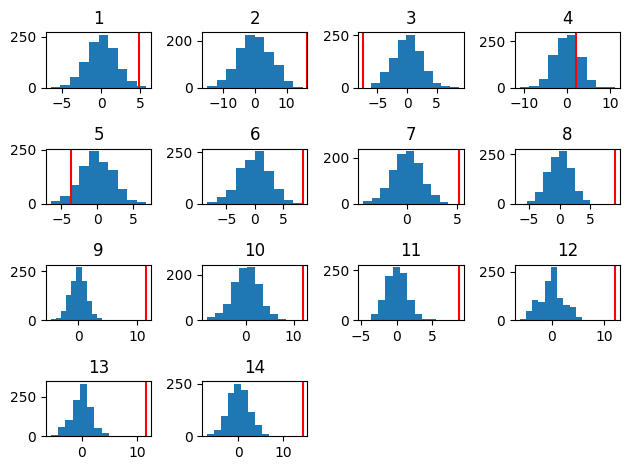

In [24]:
plt.figure()
for subject in subjects:
    # first we select the data for subject subj
    bool_s = df['subj'] == subject
    ds = df[bool_s].reset_index()

    # we form booleans for 0 deg and 15 deg trials
    bool_0 = ds['xavg'] == 0 # get a boolean for 0 deg trials
    bool_15 = ds['xavg'] == 15 # get a boolean for 15 deg trials

    # we define our statistic of interest as the difference in medians of the two lists of errors, for 0 deg and 15 deg trials.
    statistic = np.median(ds[bool_0].error) - np.median(ds[bool_15].error)

    # t-test
    t, p_val_t = ttest_ind(ds[bool_0].error, ds[bool_15].error)

    #permutation test:
    # we now generate the resampled data for the permutation test
    n_perm = 1000 # number of permutations desired
    stat_perm = []  # notice this trick in Python. We generate an empty list like this, and then we will append successively with *append* in the for loop, after the loop we make a numpy array of this list

    # --- Permutation loop (shuffle only labels, not data) ---
    for _ in range(n_perm):
        shuffled_labels = np.random.permutation(ds['xavg'])  # shuffle labels
        perm_bool_0 = shuffled_labels == 0
        perm_bool_15 = shuffled_labels == 15
        stat_perm.append(np.median(ds['error'][perm_bool_0]) - np.median(ds['error'][perm_bool_15]))

    stat_perm = np.array(stat_perm)  # convert list to numpy array


#here is the p-value of our permutation test. The number of times that our statistic exceeded the statistic of the
    #shuffles divided by the number of shuffles. We take this as the probability that we had obtained a statistic at
    #least as extreme as our true data if our null hypothesis was true.
    p_val_perm = np.mean( abs(stat_perm) > abs(statistic));

    print('Subject ' +str(subject ) +' p-value permutatation test: ' +str(p_val_perm) +', p-value t-test: ' +str(p_val_t))

    plt.subplot(4,4,subject)
    plt.hist(stat_perm)
    plt.axvline(x=statistic, color='red')
    plt.title(str(subject))

#
plt.tight_layout()
